# ArcGIS and IBM Watson 
## Machine Learning Integration for Pedestrian Activity Classification

<img src="img/integration2.jpg" style="width: 75%"></img>

In [19]:
import os
import arcgis
from watson_developer_cloud import VisualRecognitionV3

# 1. Retrieve Training Data from Survey123

In [20]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

IBM_WATSON_KEY = 'secret value'

# 2. Retrieve Models from IBM Watson

In [21]:
visual_recognition = VisualRecognitionV3('2018-03-19', iam_api_key=IBM_WATSON_KEY)

In [22]:
classifier_name = 'Esri_Classification_CobbCounty_Cam128_v2'
classifier_id = None

In [23]:
visual_recognition.list_classifiers()

{'classifiers': [{'classifier_id': 'Esri_Classification_CobbCounty_1442278062',
   'name': 'Esri_Classification_CobbCounty_Cam130_v2',
   'status': 'ready'},
  {'classifier_id': 'Esri_Classification_CobbCounty_1492191311',
   'name': 'Esri_Classification_CobbCounty_Cam129_v2',
   'status': 'ready'},
  {'classifier_id': 'Esri_Classification_CobbCounty_371717976',
   'name': 'Esri_Classification_CobbCounty_Cam130',
   'status': 'ready'},
  {'classifier_id': 'Esri_Classification_CobbCounty_361684145',
   'name': 'Esri_Classification_CobbCounty_Cam129',
   'status': 'ready'},
  {'classifier_id': 'Esri_Classification_CobbCounty_1653483892',
   'name': 'Esri_Classification_CobbCounty_Cam128_v2',
   'status': 'ready'},
  {'classifier_id': 'Esri_Classification_CobbCounty_1256542849',
   'name': 'Esri_Classification_CobbCounty_Cam128',
   'status': 'ready'}]}

In [24]:
for classifier in visual_recognition.list_classifiers()['classifiers']:    
    if classifier['name'] == classifier_name:
        classifier_id = classifier['classifier_id']

def classify_activity(img_path):
    with open(img_path, 'rb') as images_file:
        classes = visual_recognition.classify(
            images_file,
            threshold='0.0',
            classifier_ids=classifier_id)
        output_classes = classes['images'][0]['classifiers'][0]['classes']
        df = pd.DataFrame(data=output_classes)
        df = df.set_index('class')
        df.plot(kind='barh')

In [25]:
low_img_path = 'img/low.jpg'
med_img_path = 'img/medium.jpg'
high_img_path = 'img/high.jpg'

# 3. Test Classification on Sample Images

## Low Pedestrian Density Sample

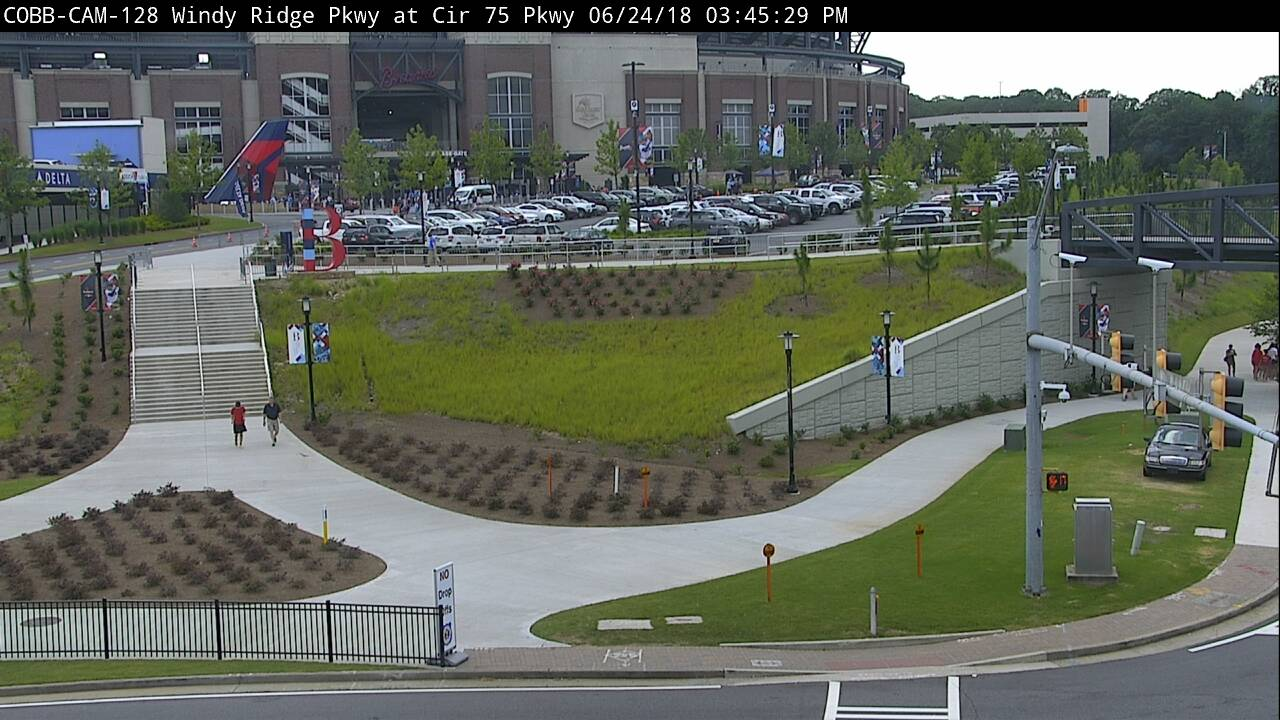

In [26]:
Image(filename=low_img_path, width=600)

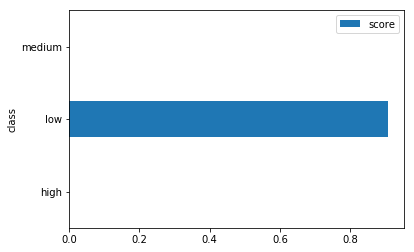

In [38]:
classify_activity(low_img_path)

## Medium Pedestrian Density Sample

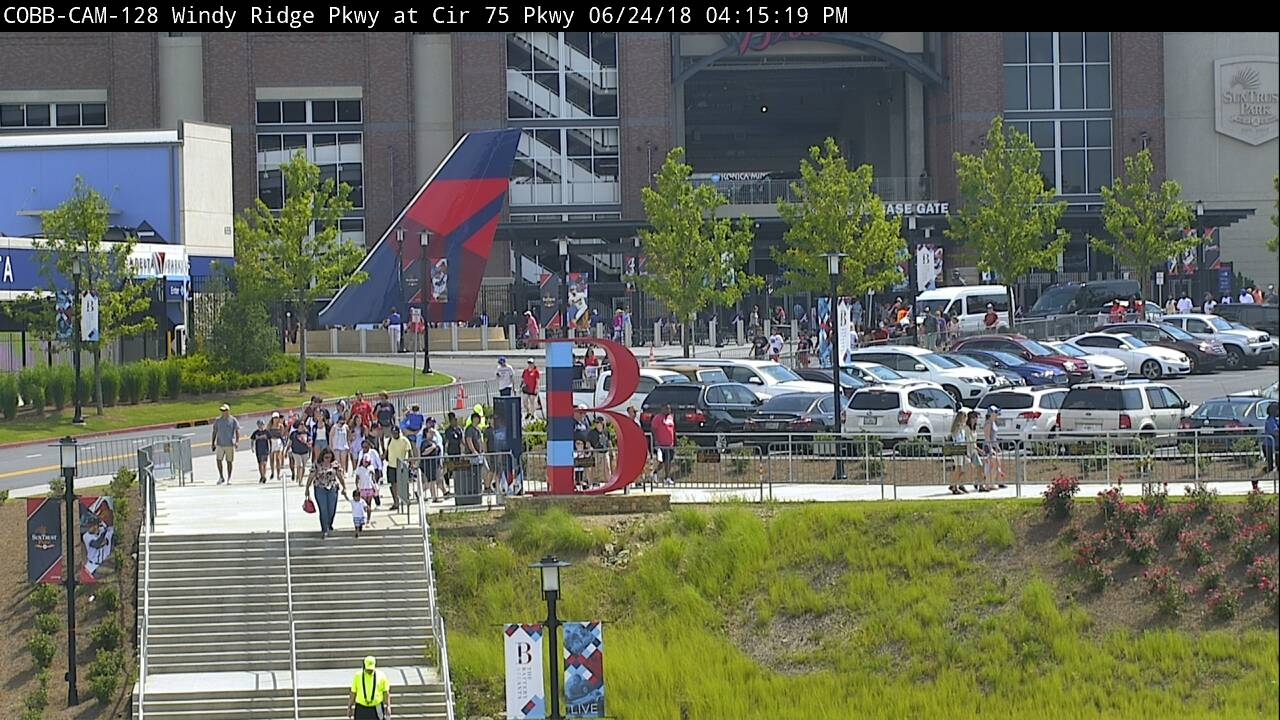

In [27]:
Image(filename=med_img_path, width=600)

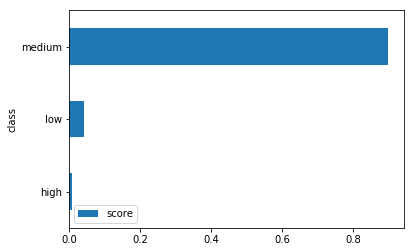

In [39]:
classify_activity(med_img_path)  

## High Pedestrian Density Sample

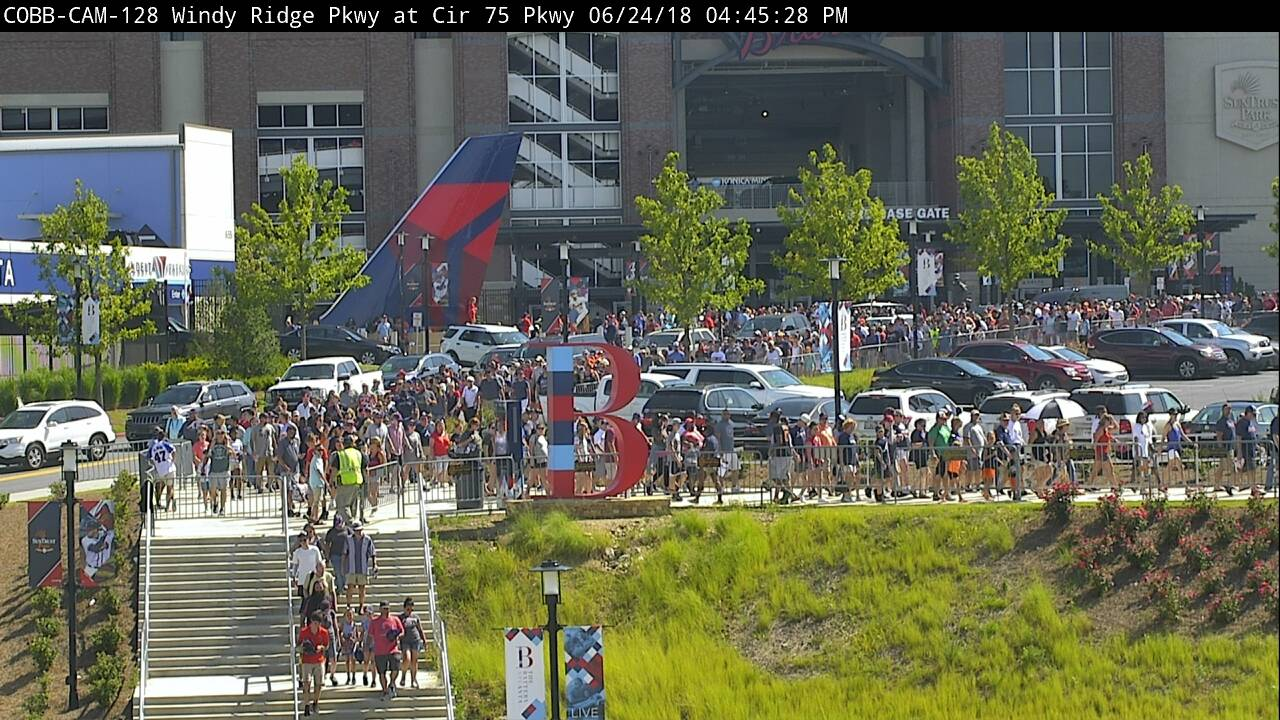

In [28]:
Image(filename=high_img_path, width=600)

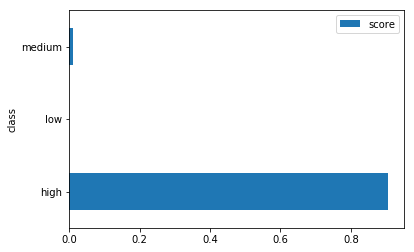

In [40]:
classify_activity(high_img_path)  